# Fit a function with Gradient Descent
Let's pick a simple function $y$ defined as

$y = 2x$

and generate a sample data:






In [1]:
from pylab import *
import pandas as pd

x = [1,2,3]
y = [2*xx for xx in x]
data = {'x':x, 'y':y}

df = pd.DataFrame(data=data, index=x)
print("Training Data:")
df

Training Data:


,x,y
1,1,2
2,2,4
3,3,6


Now let's pretend we don't know the generating function $y$. 
All we know about it is that $y$ is a linear function. 
So we can write it as:

$$y_{pred} = w*x$$



In [2]:
w = 1 # initialize the weight. but we will learn this weight in the process below.

# our model forward pass
# this is actually our y_pred as we defined above
def forward(x):
    return x * w

**Goal**:  use the training data above to find the parameter $w$. 

**Solution:** 
Loss function for our problem is:

$loss(w) = (y_{pred}-y)^2$

remembering the definition of $y_{pred} = w*x$ we can rewrite the loss function as


$loss(w) = ( w*x-y)^2$




# Define loss function

In [3]:
# Loss function
def loss(x, y):
    y_pred = forward(x) #Our previous function
    return (y_pred - y) * (y_pred - y) #loss function

To minimize the loss, we should compute the derivative of loss with respect to $w$ and interatively change $w$ to move in the direction of the descent:

![alt text](http://donsoft.io/deep-learning-with-rnns/images/gradient_descent_cropped.gif)


Derivative of loss with respect to $w$ is given by:

$$\frac{\partial loss}{\partial w } $$

$$=\frac{ \partial (w*x-y)^2}{\partial w }$$

$$=\frac{ 2 (w*x-y) \partial (w*x-y)}{\partial w } $$

$$= 2 x (w*x-y) $$

# Calculate the gradient

In [4]:
# compute gradient
# it contains the derivative of the loss function
def gradient(x, y):  # d_loss/d_w
    return 2 * x * (x * w - y) #derivative

before we start training let's see how our predictions look with the arbitrary weight $w=1$

## Before training

In [5]:
# predict the value of the predicted function at x = 4 before training
# Before training

print("predict (before training)")
print("input: 4")
print("model prediction (before training): ", forward(4), " -- correct answer: 2x4 = 8")

predict (before training)
input: 4
model prediction (before training):  4  -- correct answer: 2x4 = 8


#### Visualize training data vs predicted function values, before training:

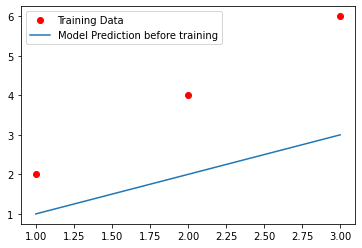

In [6]:
x_data = df['x']
y_data = df['y']
plot(x_data,y_data,'ro', label="Training Data")
plot(x_data,[forward(x) for x in x_data], label="Model Prediction before training")
legend()

#### Learning:
That's pretty bad!  Let's learn the predicting function $y_pred$ by learning the value of $w$. 

We will move $w$ according to this rule:

$w = w - learning\_rate * grad$

where $grad = \frac{\partial loss}{\partial w}$.

Let's pick a small step size as our learning rate:

$learning\_rate = 0.01$

and solve the problem using gradient descent in 10 iterations:


In [8]:
learning_rate = 0.01

# Training loop

for epoch in range(100): #n_epochs = 100
    for x_val, y_val in zip(x_data, y_data):
        
        # Compute gradient for every training data point
        grad = gradient(x_val, y_val)
        
        # Alter w based on grad and learning rate
        w = w - learning_rate * grad
        print("\tgrad: ", x_val, y_val, grad)
        
        # Calculate loss with the new w
        l = loss(x_val, y_val)

    print("progress:", epoch, "w=", w, "loss=", l)

	grad:  1 2 -2
	grad:  2 4 -7.84
	grad:  3 6 -16.2288
progress: 0 w= 1.260688 loss= 4.919240100095999
	grad:  1 2 -1.478624
	grad:  2 4 -5.796206079999999
	grad:  3 6 -11.998146585599997
progress: 1 w= 1.453417766656 loss= 2.688769240265834
	grad:  1 2 -1.093164466688
	grad:  2 4 -4.285204709416961
	grad:  3 6 -8.87037374849311
progress: 2 w= 1.5959051959019805 loss= 1.4696334962911515
	grad:  1 2 -0.8081896081960389
	grad:  2 4 -3.1681032641284723
	grad:  3 6 -6.557973756745939
progress: 3 w= 1.701247862192685 loss= 0.8032755585999681
	grad:  1 2 -0.59750427561463
	grad:  2 4 -2.3422167604093502
	grad:  3 6 -4.848388694047353
progress: 4 w= 1.7791289594933983 loss= 0.43905614881022015
	grad:  1 2 -0.44174208101320334
	grad:  2 4 -1.7316289575717576
	grad:  3 6 -3.584471942173538
progress: 5 w= 1.836707389300983 loss= 0.2399802903801062
	grad:  1 2 -0.3265852213980338
	grad:  2 4 -1.2802140678802925
	grad:  3 6 -2.650043120512205
progress: 6 w= 1.8792758133988885 loss= 0.13116896307449


## After learning
Let's see how well we are doing in prediction a single value of the function after training for 10 steps:

Looks really promising! 
Let's look at the predicted function over all values in the training range:

predict (after training)
input: 4
model prediction (after training):  7.9999999999996945  -- correct answer: 8


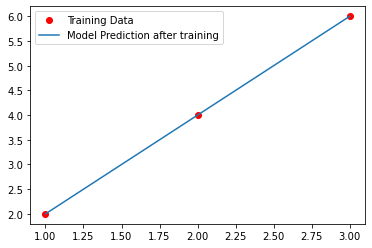

In [9]:
# After training

print("predict (after training)")
print("input: 4")
print("model prediction (after training): ", forward(4), " -- correct answer: 8")

plot(x_data,y_data,'ro', label="Training Data")
plot(x_data,[forward(x) for x in x_data], label="Model Prediction after training")
legend()

Hoorray! We have learned the desired function at a pretty good accuracy!

### Visualize the process

In [10]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import rcParams, animation, rc
from ipywidgets import interact, interactive, fixed
from ipywidgets.widgets import *
rc('animation', html='jshtml')
rcParams['figure.figsize'] = 3, 3
rcParams['animation.writer'] = 'html'


learning_rate = 0.01
w = 1 #initial weight
def upd():
    #Update the weight
    global w
    # compute gradient for every training data point
    grad = gradient(x_val, y_val)
    #alter w based on grad and learning rate
    w = w - learning_rate * grad

#Plot
fig = plt.figure(dpi=100, figsize=(5, 4))
plt.scatter(x_data,y_data)
line, = plt.plot(x_data,forward(x_data))
plt.close()

def animate(i):
    #animation plot per epoch
    global x_val, y_val
    for x_val, y_val in zip(x_data, y_data):
        line.set_ydata(forward(x_data))
        for i in range(30): 
            upd()
        
        return line,

ani = animation.FuncAnimation(fig, animate, np.arange(0, 15), interval=100)
ani

## Exercise I:

Repeat the above exercise for 

$y = x^2$ 

In [12]:
# We know our function is non-linear
w = 3 # initialize the exponent. but we will learn this weight in the process below.

# our model forward pass
# this is actually our y_pred as we defined above
def nforward(x):
    return x**w

# Define *loss function*

In [13]:
# Loss function
def nloss(x, y):
    y_pred = nforward(x)
    return (y_pred - y) * (y_pred - y)

Derivative of loss with respect to $w$ is given by:

$$\frac{\partial loss}{\partial w } $$

$$=\frac{ \partial (x^w-y)^2}{\partial w }$$

$$=2 (x^w-y)\frac{\partial (x^w-y)}{\partial w } $$

$$= 2 (x^w-y)x^w lnx $$

# Define gradient

$$\begin{align*}\frac{\partial loss}{\partial w}\end{align*}=$$
$$2 (x^w-y)x^w lnx $$

In [14]:
# compute gradient
# it contains the derivative of the loss function
def ngradient(x, y):  # d_loss/d_w
    return 2*(x**w - y)*(x**w)*(np.log(x))

In [15]:
#compare gradient with diferent values of w
w=3
print(ngradient(x_data,y_data))
w=2
print(ngradient(x_data,y_data))

1      -0.000000
2      44.361420
3    1245.826335
dtype: float64
1    -0.000000
2     0.000000
3    59.325064
dtype: float64


In [16]:
#Create our dataset 

x = [1,2,3,4,5,6]
y = [xx**2 for xx in x]

data = {'x':x, 'y':y}
df = pd.DataFrame(data=data, index=x)
print("Training Data:")
x_data = df['x']
y_data = df['y']

print(x_data)
print(y_data)

Training Data:
1    1
2    2
3    3
4    4
5    5
6    6
Name: x, dtype: int64
1     1
2     4
3     9
4    16
5    25
6    36
Name: y, dtype: int64


# Learning

In [18]:
w=1
learning_rate = 0.001
# Training loop
for epoch in range(100):
    for x_val, y_val in zip(x_data, y_data):
        # compute gradient for every training data point
        ngrad = ngradient(x_val, y_val)
        #alter w based on grad and learning rate
        w = w - (learning_rate * ngrad)
    print("iteration",epoch,"loss",nloss(x_val,y_val))

iteration 0 loss 9738.333343449403
iteration 1 loss 1269.9695369617466
iteration 2 loss 1263.8203277745092
iteration 3 loss 1254.3523547071864
iteration 4 loss 1238.1592496021817
iteration 5 loss 1205.3080263394882
iteration 6 loss 1113.372922635719
iteration 7 loss 570.6593061574248
iteration 8 loss 1023.600117636176
iteration 9 loss 31.767229668667955
iteration 10 loss 51.83693928520148
iteration 11 loss 302.6696854183198
iteration 12 loss 1268.1767247538012
iteration 13 loss 1261.14070711984
iteration 14 loss 1249.9750215494716
iteration 15 loss 1229.956269038512
iteration 16 loss 1185.8263005254646
iteration 17 loss 1038.2141348620307
iteration 18 loss 2.0457949630279155
iteration 19 loss 0.9790699863312959
iteration 20 loss 0.2862169674723827
iteration 21 loss 0.04275675467004911
iteration 22 loss 0.0032707595077698442
iteration 23 loss 0.00016847166811409937
iteration 24 loss 7.596749572046448e-06
iteration 25 loss 3.317568391586737e-07
iteration 26 loss 1.4388568359849175e-08
it

#### After learning

In [19]:
# After training
print("predict (after training)")
print("input: 10")
print("model prediction (after training): ", nforward(10), " -- correct answer: 100")

predict (after training)
input: 10
model prediction (after training):  100.0  -- correct answer: 100


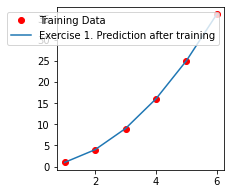

In [22]:
plot(x_data, y_data, 'ro', label='Training Data')
plot(x_data, [nforward(x) for x in x_data], label = 'Exercise 1. Prediction after training')
legend()

## Exercise II:
Use the above method for

$y = 5x+3$

**Hint:** 
You need to learn two values: $w$ and $b$. And your prediction function is

$y_{pred} = w*x + b$

and your gradient descent looks something like this:

![alt text](https://media.giphy.com/media/O9rcZVmRcEGqI/giphy.gif)

In [27]:
# We know our model is linear
w = 2 # initialize the exponent. but we will learn this weight in the process below.
b = 1
# our model forward pass
# this is actually our y_pred as we defined above
def forward(x):
    return x*w+b

# Define loss function of two parameters

In [28]:
from pylab import *
import pandas as pd

x = [1,2,3,4,5,6]
y = [xx*5+3 for xx in x]

data = {'x':x, 'y':y}
df = pd.DataFrame(data=data, index=x)
print("Training Data:")
x_data = df['x']
y_data = df['y']

print(x_data)
print(y_data)

Training Data:
1    1
2    2
3    3
4    4
5    5
6    6
Name: x, dtype: int64
1     8
2    13
3    18
4    23
5    28
6    33
Name: y, dtype: int64


In [29]:
import numpy as np
# Loss function
def loss(x, y):
    y_pred = nforward(x)
    return (y_pred - y) * (y_pred - y)

Derivative of loss with respect to $w$ is given by:

$$\frac{\partial loss}{\partial w } $$

$$=\frac{ \partial (x*w+b-y)^2}{\partial w }$$

$$=2 (x*w+b-y)\frac{\partial (x*w+b-y)}{\partial w } $$

$$=2 (x*w+b-y) x $$ 




Derivative of loss with respect to $b$ is given by:

$$\frac{\partial loss}{\partial b } $$

$$=\frac{ \partial (x*w+b-y)^2}{\partial b }$$

$$=2 (x*w+b-y)\frac{\partial (x*w+b-y)}{\partial b } $$

$$=2 (x*w+b-y) 1 $$ 


The second is included in the first restriction

# Define gradient

$\begin{align*}\frac{\partial loss}{\partial w}\end{align*}=$
$2 (x*w+b-y) x $ \\

$\begin{align*}\frac{\partial loss}{\partial b}\end{align*}=$
$2 (x*w+b-y) $

In [30]:
# compute gradient
# it contains the derivative of the loss function
def wgradient(x, y):  # d_loss/d_w
    return 2*(x*w+b - y)*(x)
def bgradient(x, y):  # d_loss/d_w
    return 2*(x*w+b - y)

In [31]:
#compare gradient with diferent values of w
w=3; b=1
print(wgradient(x_data,y_data))
print(bgradient(x_data,y_data))

1     -8
2    -24
3    -48
4    -80
5   -120
6   -168
dtype: int64
1    -8
2   -12
3   -16
4   -20
5   -24
6   -28
dtype: int64


# Learning 

In [33]:
# start the parameters
w=1.2
b=1
learning_rate = 0.01
# Training loop
for epoch in range(5000):
    for x_val, y_val in zip(x_data, y_data):
        # compute gradient for every training data point
        wgrad = wgradient(x_val, y_val)
        bgrad = bgradient(x_val, y_val)
        #alter w based on grad and learning rate
        w = w - (learning_rate * wgrad)
        b = b - (learning_rate * bgrad)
        

#After learning

In [34]:
# After training
print("predict (after training)")
print("input: 20")
print("model prediction (after training): ", forward(20), " -- correct answer: 103")

predict (after training)
input: 20
model prediction (after training):  103.00000000000004  -- correct answer: 103
